# NumpySVM_Iris

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import seaborn as sns
%matplotlib inline

# Loading dataset
data = load_iris()

In [2]:

iris = pd.DataFrame(np.c_[data.data,data.target],columns = data['feature_names'] + ['target'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
iris.keys()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [4]:
# delete the third label. Because we just build a binary SVM classifier
iris = iris[iris.target!=2]

C:\Users\83409\.conda\envs\deepLearning\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


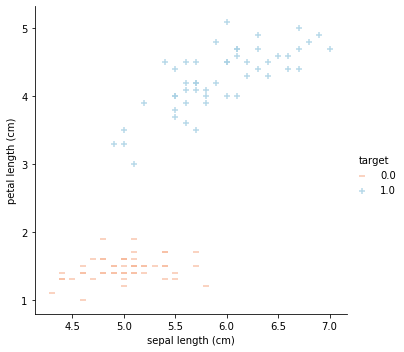

In [5]:
sns.lmplot(iris.keys()[0], iris.keys()[2], iris, hue = 'target',fit_reg=False, palette ="RdBu" , markers=["_","+"], size=5)

In [6]:
# drop the features which we don't use

iris = iris.drop([iris.keys()[1], iris.keys()[3]], axis = 1)
iris.head()

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0.0
1,4.9,1.4,0.0
2,4.7,1.3,0.0
3,4.6,1.5,0.0
4,5.0,1.4,0.0


In [7]:
# shuffle the data and replace the negative point to -1

iris = shuffle(iris)
iris.replace(to_replace=0, value=-1, inplace=True)
iris.head()

,sepal length (cm),petal length (cm),target
48,5.3,1.5,-1.0
36,5.5,1.3,-1.0
71,6.1,4.0,1.0
22,4.6,1.0,-1.0
65,6.7,4.4,1.0


In [8]:
# get feature name

features = iris.keys()[:2]


In [9]:
# split the train_test data
X_train,X_test,y_train,y_test = train_test_split(iris[features.tolist()],iris.target,train_size=0.9)


In [10]:
x_train = X_train.values
x_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [47]:
# Build the SVM gradient descent
# Hinge loss: max(0,1-y*y_pred)
# Objective Function: min(lambd*w^2)+sum(Hinge loss)

def svm_gradient_descent(X,y,learning_rate=0.001,epochs=10000):
    w = np.zeros(len(X[0]))
    b = 0
    costs = []
    for epoch in range(1,epochs):
        cost = 0
        lambd = 1/epoch
        for i, x in enumerate(X):
#             Hinge loss:
            if (y[i]*(np.dot(X[i], w)+b)) < 1:
#                 misclassified
                cost = cost + 1-(y[i]*(np.dot(X[i], w)+b))
                w = w + learning_rate * ((X[i] * y[i]) + (-2 * lambd * w))
                b = b + learning_rate * ((y[i]) + (-2 * lambd * b))
            else:
#                 correct
                w = w + learning_rate * (-2 * lambd * w)
                b = b + learning_rate * (-2 * lambd * b)
        
        costs.append(cost)
        if epoch % 500 == 0:
            print("weights: ",w, " bias:",b)
            
    plt.plot(costs)
    plt.xlim(0,30)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    return w,b

weights:  [-0.7871992   1.87041963]  bias: -0.3020767910796645


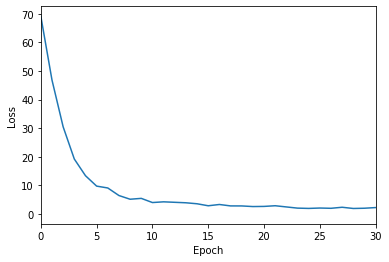

In [48]:
w,b = svm_gradient_descent(x_train,y_train,learning_rate = 0.01,epochs = 1000)

C:\Users\83409\.conda\envs\deepLearning\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


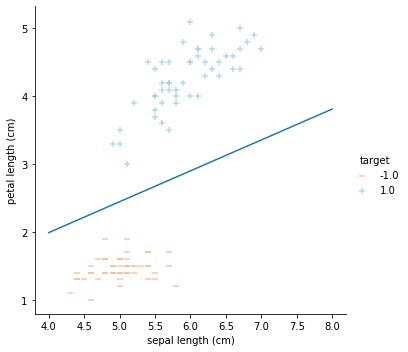

In [49]:
# plot the hyperplane

sns.lmplot(iris.keys()[0], iris.keys()[1], iris, hue = 'target',fit_reg=False, palette ="RdBu" , markers=["_","+"], size=5)

a = -w[0]/w[1]
xx = np.linspace(4,8)
yy = a * xx - b/w[1]
plt.plot(xx,yy)

In [50]:

from sklearn.metrics import accuracy_score

# Get the test data features 
test_f1 = x_test[:,0]
test_f2 = x_test[:,1]

test_f1 = test_f1.reshape(10,1)
test_f2 = test_f2.reshape(10,1)
## Predict
y_pred = w[0] * test_f1 + w[1] * test_f2 + b
predictions = []
for val in y_pred:
    if(val > 1):
        predictions.append(1)
    else:
        predictions.append(-1)

print(accuracy_score(y_test,predictions))

1.0
